In [ ]:
!pip install gensim

방법1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [14]:
##1000건의 데이터
#file = r'C:\Users\user\ohg\in_data\중학생+질문 20201005-1(질문).csv'

#84460건의 데이터
file = r'C:\Users\user\ohg\in_data\중학생+질문 20201202(QA).csv'
df = pd.read_csv(file) 
train_data = df = pd.read_csv(file) 


In [15]:
# 데이터건수 출력
print(len(train_data))
# NULL 값 존재 유무
print(train_data.isnull().values.any())

84460
False


In [16]:
# 불용어 정의 및 가져오기
stopwords = open("./stopword/stopword.txt", encoding = "UTF8").read()
print(stopwords)

﻿[
]
#
^
.
(
)
>
<
♥
ㄳ
☆
★
♡
♤
❢
o
ㅁ
ㅋ
ㄱ
\
%
~
(:
※
①
②
③
④
중학생
질문
제
좀
요
때
저
답변
내공
이제
중
지금
가지
추천
전
것
뭐
정도
이번
대해
이
올해
가요
그냥
하나요
답
안
날
요즘
곳
해
더
번
막
곧
성의껏
애
거
일단
꼭
현재
정말
조금
저희
한번
보통
참고
부탁
또
등
관련
지식인
거기
쪽
게
몇개
무엇
이면
제일
데
예
진짜
우선
저가
등등
해도
여러가지
혹시
거의
이구
원래
혹시
뭔가
몇
고요
만약
헤헤
약간
때문
가장
여기
별로
고
존나
죄송
흣
아시
대답
못
성심
대부분
쫌
를
내
헤
살짝
먼저
다시
호호
뭘
과
자주
다음
미래
여러분
얼마나
이상
자신
우리
아주
꽤
무슨
동안
겸
평소
새끼
어제
모두
전체
그때
자기
하자
웬만큼
오
쯤
무쟈
나중
내일
법좀
대충
얘
주로
처
왜
처럼
갑자기
나
외
제발
정성껏
전혀
래서
네
부쩍
그때되
요기
어디가
하이
옛날
점점
뎅
아마
잠깐
만쿤
것습니
후기
비롯
함
서로
이건
한가지
각각
겉
다음주
저녁
관해
이요
몇시
답좀
아예
짓
그다음
무척
떈
가튼뎁
대략
뇬
우린
웃
땐
그거
겹
모든
확
안녕
전부
이예
밨
간다
무조건
따라서
한편
제대로
이쯤
며칠
체적
그게
요약
건가
떄문












In [ ]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['question']:
    #temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
print(tokenized_data)

질문의 최대 길이 : 18
질문의 평균 길이 : 7.668


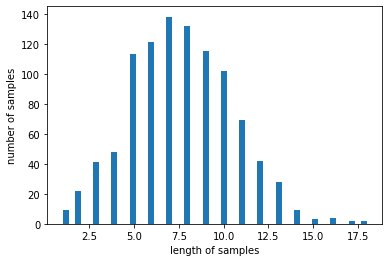

In [7]:
# 질문 길이 분포 확인
print('질문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('질문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [8]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [9]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(362, 100)

In [10]:
print(model.wv.most_similar("교복"))

[('과외', 0.9407587051391602), ('머리', 0.9378435015678406), ('개인', 0.9323831796646118), ('예비', 0.9307996034622192), ('중학교', 0.9261023998260498), ('학원', 0.9237028956413269), ('공부', 0.9204938411712646), ('집', 0.9195700883865356), ('사람', 0.9178169965744019), ('친구', 0.9167762994766235)]


In [11]:
print(model.wv.most_similar("친구"))

[('머리', 0.945189356803894), ('과외', 0.9425258040428162), ('예비', 0.9414204359054565), ('영어', 0.9404187202453613), ('중학교', 0.9353958368301392), ('학년', 0.9329538345336914), ('여자', 0.9278048276901245), ('수', 0.9275861382484436), ('키', 0.9273991584777832), ('로션', 0.9235938191413879)]


In [13]:
print(model)

Word2Vec(vocab=362, size=100, alpha=0.025)


방법2

In [ ]:
from konlpy.tag import Okt  
okt=Okt()

##1000건의 데이터
#file = r'C:\Users\user\ohg\in_data\중학생+질문 20201005-1(질문).csv'

#84460건의 데이터
file = r'C:\Users\user\ohg\in_data\중학생+질문 20201202(QA).csv'

fread = open(file, encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=0)
model_result1 = model.wv.most_similar("교복")
print(model_result1)